In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

# the project's folder
# %cd '/gdrive/My Drive/Colab Notebooks/beeWatch'

Mounted at /content/gdrive


In [3]:
#!ls -la "/content/gdrive/My Drive/darknet" #gabriela
!ls -la "/content/gdrive/My Drive/Bees/darknet" #pascal

ls: '/content/gdrive/My Drive/Bees/darknet': No such file or directory
lrw------- 1 root root 0 Jun 11 07:06 '/content/gdrive/My Drive/Bees/darknet' -> /content/gdrive/.shortcut-targets-by-id/17mTQanLeTbYrBmIInKmp3PVgqdMuRxV_/darknet


In [4]:
!python -V

Python 3.6.9


## Settings


In [5]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [6]:
#!tree /content/gdrive/My\ Drive/darknet/ #gabriela
!tree /content/gdrive/My\ Drive/Bees/darknet/ #pascal

Streaming output truncated to the last 5000 lines.
│       │       │   │   │   ├── 99_1.png
│       │       │   │   │   ├── 99_2.png
│       │       │   │   │   ├── 99_3.png
│       │       │   │   │   ├── 99_4.png
│       │       │   │   │   ├── 99_5.png
│       │       │   │   │   ├── 99_6.png
│       │       │   │   │   ├── 99_7.png
│       │       │   │   │   └── make_labels.py
│       │       │   │   ├── openimages.data
│       │       │   │   ├── openimages.names
│       │       │   │   ├── person.jpg
│       │       │   │   ├── scream.jpg
│       │       │   │   ├── voc
│       │       │   │   │   └── voc_label.py
│       │       │   │   ├── voc.data
│       │       │   │   └── voc.names
│       │       │   ├── densenet201_yolo.cfg
│       │       │   ├── dog.jpg
│       │       │   ├── dogr.jpg
│       │       │   ├── gen_anchors.py
│       │       │   ├── partial.cmd
│       │       │   ├── pthreadGC2.dll
│       │       │   ├── pthreadVC2.dll
│       │       │   ├── resnet152

Check CUDA Version

In [0]:
# CUDA: check which version of Nvidia CUDA is already installed
!/usr/local/cuda/bin/nvcc --version


Install cuDNN according to the current CUDA version

a - Download cuDNN from [Nvidia website](https://developer.nvidia.com/cudnn) 

b- On local computer, create a folder named _**cuDNN**_ in local folder _**darknet**_. Copy the _**tgz**_ file there 

Check that it matches ( **CUDA 10.0** needs [cuDNN v7.5.0.56 for CUDA v10.0](https://developer.nvidia.com/compute/machine-learning/cudnn/secure/v7.5.0.56/prod/10.0_20190219/cudnn-10.0-linux-x64-v7.5.0.56.tgz) - the file is cudnn-10.0-linux-x64-v7.5.0.56.tgz )

In [10]:
# Unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
#!tar -xzvf /content/gdrive/My\ Drive/darknet/cuDNN/cudnn-10.1-linux-x64-v7.6.5.32.tgz -C /usr/local/ #gabriela
!tar -xzvf /content/gdrive/My\ Drive/Bees/darknet/cuDNN/cudnn-10.1-linux-x64-v7.6.5.32.tgz -C /usr/local/ #pasca

!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.6.5
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 6
#define CUDNN_PATCHLEVEL 5
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [46]:
import os
print(os.getcwd())
#!ls
#!ls /content/gdrive/My\ Drive/darknet/




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-46-a0c6bcf24fad>", line 2, in <module>
    print(os.getcwd())
FileNotFoundError: [Errno 2] No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.6/dist-packages/IPyth

FileNotFoundError: ignored

In [0]:
!rm -rf darknet

Copy the compiled version of Darknet from Drive to the VM.
* Make the local darknet folder
* Copy the darknet file
* Set execution permissions

In [13]:
# Uncomment after the first run, when you have a copy of compiled darkent in your Google Drive

# Makes a dir for darknet and move there
!mkdir darknet
%cd darknet

# Copy the Darkent compiled version to the VM local drive
!cp -r /content/gdrive/My\ Drive/Bees/darknet/bin/darknet ./ #./darknet

# Set execution permissions to Darknet
!chmod +x ./darknet


/content/darknet/darknet/darknet
^C


In [0]:
%cd darknet/
print(os.getcwd())
!chmod +x ./darknet
!ls -la

/content/darknet/darknet
/content/darknet/darknet
total 245676
drwx--x--x 15 root root      4096 May 14 09:52 .
drwxr-xr-x  3 root root      4096 May 14 09:39 ..
drwx------  4 root root      4096 May 14 09:40 3rdparty
-rw-------  1 root root      5899 May 14 09:40 appveyor.yml
drwx------  2 root root      4096 May 14 09:52 backup
drwx------  3 root root      4096 May 14 09:40 build
-rw-------  1 root root      8163 May 14 09:40 build.ps1
-rw-------  1 root root      2886 May 14 09:40 build.sh
drwx------  3 root root      4096 May 14 09:47 cfg
drwx------  2 root root      4096 May 14 09:39 .circleci
drwx------  3 root root      4096 May 14 09:47 cmake
-rw-------  1 root root     17356 May 14 09:40 CMakeLists.txt
-rw-------  1 root root      6380 May 14 09:40 CMakeSettings.json
-rwx--x--x  1 root root   3213624 May 14 09:52 darknet
-rw-------  1 root root      1254 May 14 09:40 DarknetConfig.cmake.in
-rw-------  1 root root     16255 May 14 09:47 darknet.py
-rw-------  1 root root      4

In [0]:
# if folder was created in folder... :/
%cd darknet
print(os.getcwd())
!chmod +x ./darknet
!ls -la

Some Utils

* imgShow() - Will help us to show an image in the remote VM
* download() - Will allow you to get some file from your notebook in case you need to
* upload() - You can upload files to your current folder on the remote VM.

[Ivan Goncharov](https://twitter.com/Ivangrov)

In [0]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

##  Runtime configuration finished
Validate



In [0]:
# Get yolov3 weights if you want to test with sample data
#!wget https://pjreddie.com/media/files/yolov3.weights

# or

!cp /content/gdrive/My\ Drive/darknet/yolov3.weights /content/darknet/darknet

In [0]:
# ggg TODO Delete, should have different coco for bees
#!cp -r /content/gdrive/My\ Drive/darknet/bin/darknet/cfg/coco.names /content/darknet/cfg
#!ls /content/darknet/darknet/cfg -la
!cp -r /content/gdrive/My\ Drive/darknet/bin/darknet/cfg/coco.data ./cfg


In [0]:
#overwrite predictions to check if it worked
!ls #./cfg -l
!cp data/dog.jpg predictions.jpg
!ls ./data

3rdparty      CMakeLists.txt	      image_yolov3.sh	     README.md
appveyor.yml  CMakeSettings.json      include		     results
backup	      darknet		      json_mjpeg_streams.sh  scripts
build	      DarknetConfig.cmake.in  LICENSE		     src
build.ps1     darknet.py	      Makefile		     video_v2.sh
build.sh      darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
cfg	      data		      obj		     yolov3.weights
cmake	      image_yolov2.sh	      predictions.jpg
9k.tree     eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names
dog.jpg     horses.jpg	 openimages.names


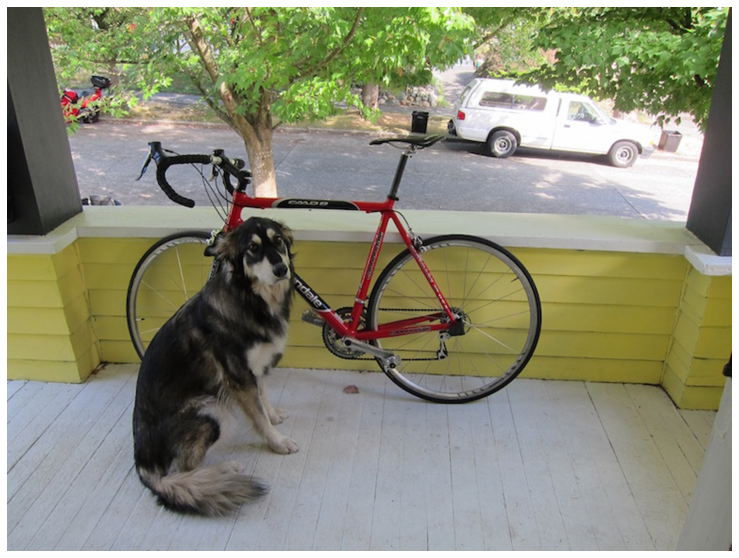

In [0]:
imShow('predictions.jpg')

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x  52 x 256   ->    52 x  52 x 128 0.177 BF
  14 c

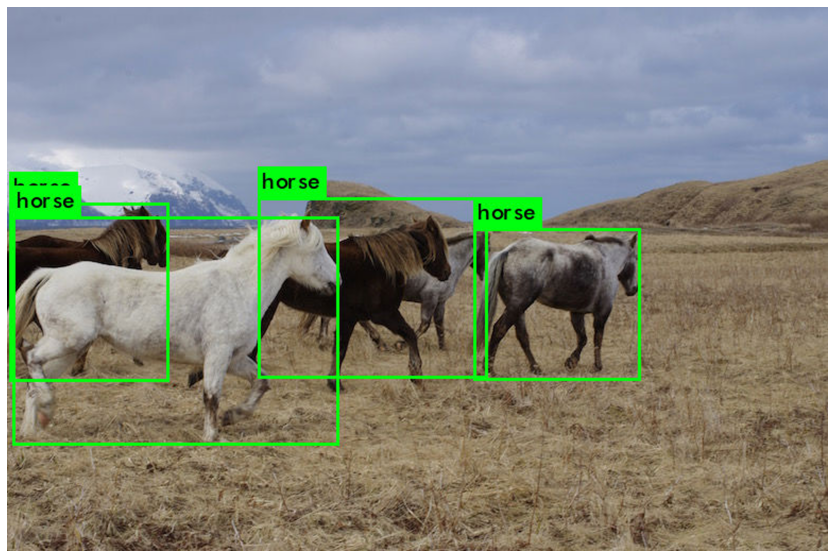

In [0]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg' and standard data
!./darknet detect "cfg/yolov3.cfg" "yolov3.weights" "data/horses.jpg" -dont-show

# Show the result using the helper imgShow()
imShow('predictions.jpg')

## PART 2. Test 


In [0]:
# Copy fils from Google Drive to the VM local filesystem
!cp -r "/content/gdrive/My Drive/darknet/img" ./img


In [0]:
# Copy video files from Drive to VM
!cp -r "/content/gdrive/My Drive/darknet/vid" ./vid

In [0]:
print(os.getcwd())
!ls ./vid
#!ls ./img

/content/darknet/darknet
bees_2.mp4  IMG_6422.MOV  mucho_bess_2.mp4


# Test Images

In [0]:
!./darknet detect "/content/gdrive/My Drive/darknet/yolov3_bees.cfg" "/content/gdrive/My Drive/darknet/backup_yolo3/yolov3_last.weights" ./img/BeeWatch8304-20190727-153421-1564234461_29082.png
#!./darknet detect "cfg/yolov3.cfg" "yolov3.weights" "data/person.jpg" -dont-show
boxes = []
confidences = []
class_ids = []

layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32 0.639 BF
   1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64 3.407 BF
   2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32 0.379 BF
   3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128 3.407 BF
   6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
   7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64 0.379 BF
  10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128 3.407 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   152 x 152 x 128   ->    76 x  76 x 256 3.407 BF
  13 conv    128  1 x 1 / 1    76 x  76 x 256   ->    76 x  76 x 128 0.379 BF
  14 c

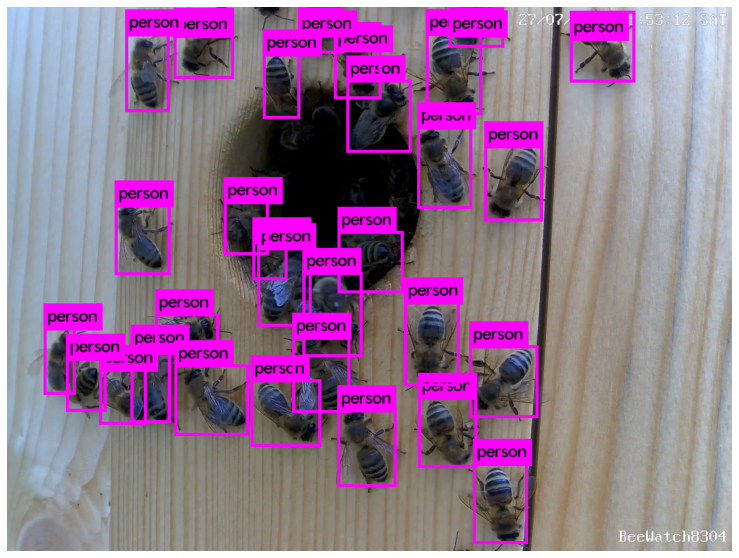

In [0]:
imShow('predictions.jpg')

In [0]:
!./darknet detect "/content/gdrive/My Drive/darknet/yolov3.cfg" "/content/gdrive/My Drive/darknet/backup_yolo3/yolov3_last.weights" ./img/0120190927131427_6048.png
imShow('predictions.jpg')

In [0]:
!./darknet detect "/content/gdrive/My Drive/darknet/yolov3.cfg" "/content/gdrive/My Drive/darknet/backup_yolo3/yolov3_last.weights" /content/gdrive/My\ Drive/darknet/images_test/frame248.jpg
imShow('predictions.jpg')

## Test Video


In [0]:
print(os.getcwd())
!ls

In [0]:
!mkdir output
!ls ./output/

In [0]:
#video easy command
# works but does not show video and does not save video output

!./darknet detector demo '/content/gdrive/My Drive/darknet/bee.data' '/content/gdrive/My Drive/darknet/yolov3_bees.cfg' '/content/gdrive/My Drive/darknet/backup_yolo3/yolov3_last.weights' '/content/gdrive/My Drive/darknet/vid/bees_2.mp4' -dont_show

In [0]:
# works and saves video!
!./darknet detector demo '/content/gdrive/My Drive/darknet/bee.data' '/content/gdrive/My Drive/darknet/yolov3_bees.cfg' '/content/gdrive/My Drive/darknet/backup_yolo3/yolov3_last.weights' -dont_show '/content/gdrive/My Drive/darknet/vid/bees_2.mp4' -i 0 -out_filename res.avi

In [0]:
# works and saves video!
#mucho_bess_2.mp4
!./darknet detector demo '/content/gdrive/My Drive/darknet/bee.data' '/content/gdrive/My Drive/darknet/yolov3_bees.cfg' '/content/gdrive/My Drive/darknet/backup_yolo3/yolov3_last.weights' -dont_show '/content/gdrive/My Drive/darknet/vid/IMG_6422.MOV' -i 0 -out_filename res.avi

Streaming output truncated to the last 5000 lines.
FPS:7.6

 cvWriteFrame 
Objects:

bee: 88% 
bee: 43% 

FPS:7.6

 cvWriteFrame 
Objects:

bee: 92% 
bee: 35% 
bee: 32% 

FPS:8.1

 cvWriteFrame 
Objects:

bee: 83% 
bee: 50% 
bee: 35% 

FPS:7.5

 cvWriteFrame 
Objects:

bee: 75% 
bee: 34% 

FPS:7.3

 cvWriteFrame 
Objects:

bee: 69% 
bee: 33% 
bee: 32% 

FPS:8.0

 cvWriteFrame 
Objects:

bee: 27% 

FPS:7.5

 cvWriteFrame 
Objects:

bee: 77% 
bee: 25% 

FPS:8.2

 cvWriteFrame 
Objects:

bee: 38% 
bee: 27% 

FPS:8.0

 cvWriteFrame 
Objects:

bee: 52% 
bee: 45% 

FPS:7.2

 cvWriteFrame 
Objects:

bee: 53% 
bee: 38% 

FPS:7.5

 cvWriteFrame 
Objects:

bee: 91% 
bee: 36% 

FPS:7.6

 cvWriteFrame 
Objects:

bee: 58% 
bee: 55% 

FPS:7.7

 cvWriteFrame 
Objects:

bee: 99% 
bee: 81% 

FPS:7.7

 cvWriteFrame 
Objects:

bee: 61% 

FPS:8.3

 cvWriteFrame 
Objects:

bee: 81% 
bee: 35% 

FPS:7.1

 cvWriteFrame 
Objects:

bee: 95% 
bee: 38% 

FPS:7.3

 cvWriteFrame 
Objects:

bee: 97% 
bee: 46% 
bee: 

In [0]:
# TODO TEST OPTION
import os 

def predictVideo(videoDir):
  os.system(""" ./darknet detector demo /content/gdrive/My\ Drive/darknet/bee.data /content/gdrive/My Drive/darknet/yolov3_bees.cfg /content/gdrive/My\ Drive/darknet/backup_yolo3/yolov3_last.weights \
  -dont_show {} -i 0 -out_filename res.avi
  """.format(videoDir))


#predictVideo("/content/gdrive/My\ Drive/darknet/vid/bees_2.mp4")

In [0]:
!ls -la

total 353056
drwx--x--x 17 root root      4096 May 14 09:59 .
drwxr-xr-x  3 root root      4096 May 14 09:39 ..
drwx------  4 root root      4096 May 14 09:40 3rdparty
-rw-------  1 root root      5899 May 14 09:40 appveyor.yml
drwx------  2 root root      4096 May 14 09:52 backup
drwx------  3 root root      4096 May 14 09:40 build
-rw-------  1 root root      8163 May 14 09:40 build.ps1
-rw-------  1 root root      2886 May 14 09:40 build.sh
drwx------  3 root root      4096 May 14 09:47 cfg
drwx------  2 root root      4096 May 14 09:39 .circleci
drwx------  3 root root      4096 May 14 09:47 cmake
-rw-------  1 root root     17356 May 14 09:40 CMakeLists.txt
-rw-------  1 root root      6380 May 14 09:40 CMakeSettings.json
-rwx--x--x  1 root root   3213624 May 14 09:52 darknet
-rw-------  1 root root      1254 May 14 09:40 DarknetConfig.cmake.in
-rw-------  1 root root     16255 May 14 09:47 darknet.py
-rw-------  1 root root      4010 May 14 09:47 darknet_video.py
drwx------  3 ro

In [0]:
!du -h res.avi

105M	res.avi


In [0]:
from google.colab import files

files.download('/content/darknet/darknet/res.avi')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 52018, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

### Get bounding boxes information

In [0]:
# import the necessary packages
import numpy as np
import imutils
import time
import cv2
import os

# arguments
args_confidence = 0.5
args_threshold = 0.3
weightsPath = '/content/gdrive/My Drive/darknet/backup_yolo3/yolov3_last.weights'
configPath = '/content/gdrive/My Drive/darknet/yolov3_bees.cfg'
videoPath = '/content/gdrive/My Drive/darknet/vid/mucho_bess_2.mp4'
outputPath = './output' #'/content/gdrive/My Drive/darknet/output/'

# load the class labels our YOLO model was trained on
labelsPath = '/content/gdrive/My Drive/darknet/bee.names'  
LABELS = open(labelsPath).read().strip().split("\n")
# initialize a list of colors to represent each possible class label
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")
# derive the paths to the YOLO weights and model configuration

#'/content/gdrive/My Drive/darknet/obj.data'  

# load our YOLO object detector trained on your dataset 
# and determine only the *output* layer names that we need from YOLO
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# initialize the video stream, pointer to output video file, and
# frame dimensions
vs = cv2.VideoCapture(videoPath)
writer = None
(W, H) = (None, None)
# try to determine the total number of frames in the video file
try:
	prop = cv2.cv.CV_CAP_PROP_FRAME_COUNT if imutils.is_cv2() \
		else cv2.CAP_PROP_FRAME_COUNT
	total = int(vs.get(prop))
	print("[INFO] {} total frames in video".format(total))
# an error occurred while trying to determine the total
# number of frames in the video file
except:
	print("[INFO] could not determine # of frames in video")
	print("[INFO] no approx. completion time can be provided")
	total = -1

# initialize our lists of detected bounding boxes, confidences,
# and class IDs, respectively
boxes = []
confidences = []
classIDs = []
framesCaptured = 0
boxes_to_frames = []

# loop over frames from the video file stream
while True:
	# read the next frame from the file
	(grabbed, frame) = vs.read()
	# if the frame was not grabbed, then we have reached the end
	# of the stream
	if not grabbed:
		break
	# if the frame dimensions are empty, grab them
	if W is None or H is None:
		(H, W) = frame.shape[:2]
	
	# ggg 
	framesCaptured += 1
	
	# construct a blob from the input frame and then perform a forward
	# pass of the YOLO object detector, giving us our bounding boxes
	# and associated probabilities
	blob = cv2.dnn.blobFromImage(frame, 1 / 255.0, (608, 608), swapRB=True, crop=False)
	net.setInput(blob)
	start = time.time()
	layerOutputs = net.forward(ln)
	end = time.time()
	# loop over each of the layer outputs
	for output in layerOutputs:
		# loop over each of the detections
		for detection in output:
			# extract the class ID and confidence (i.e., probability)
			# of the current object detection
			scores = detection[5:]
			classID = np.argmax(scores)
			confidence = scores[classID]
			# filter out weak predictions by ensuring the detected
			# probability is greater than the minimum probability
			if confidence > args_confidence:
				# scale the bounding box coordinates back relative to
				# the size of the image, keeping in mind that YOLO
				# actually returns the center (x, y)-coordinates of
				# the bounding box followed by the boxes' width and
				# height
				box = detection[0:4] * np.array([W, H, W, H])
				(centerX, centerY, width, height) = box.astype("int")
				# use the center (x, y)-coordinates to derive the top
				# and and left corner of the bounding box
				x = int(centerX - (width / 2))
				y = int(centerY - (height / 2))
				# update our list of bounding box coordinates,
				# confidences, and class IDs
				boxes.append([x, y, int(width), int(height)])
				confidences.append(float(confidence))
				classIDs.append(classID)
				boxes_to_frames.append([framesCaptured,x, y, int(width), int(height),confidence])
	# apply non-maxima suppression to suppress weak, overlapping bounding boxes
	#idxs = cv2.dnn.NMSBoxes(boxes, confidences, args_confidence, args_threshold)
	# ggg log everything
	idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)

	# ensure at least one detection exists
	if len(idxs) > 0:
		# loop over the indexes we are keeping
		for i in idxs.flatten():
			# extract the bounding box coordinates
			(x, y) = (boxes[i][0], boxes[i][1])
			(w, h) = (boxes[i][2], boxes[i][3])
			# draw a bounding box rectangle and label on the frame
			color = [int(c) for c in COLORS[classIDs[i]]]
			cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
			text = "{}: {:.4f}".format(LABELS[classIDs[i]],
				confidences[i])
			cv2.putText(frame, text, (x, y - 5),
				cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
	# check if the video writer is None
	if writer is None:
		# initialize our video writer
		#fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		#writer = cv2.VideoWriter(outputPath, fourcc, 30,
		#	(frame.shape[1], frame.shape[0]), True)
	
		#ggg 
		#writer = cv2.VideoWriter('output.avi', -1, 20.0, (640,480))
		writer = cv2.VideoWriter('output.avi', -1, 25.0, (frame.shape[1], frame.shape[0]))

		# some information on processing single frame
		if total > 0:
			elap = (end - start)
			print("[INFO] single frame took {:.4f} seconds".format(elap))
			print("[INFO] estimated total time to finish: {:.4f}".format(
				elap * total))
	# write the output frame to disk
	writer.write(frame)
# release the file pointers
print("[INFO] cleaning up...")
writer.release()
vs.release()

[INFO] loading YOLO from disk...
[INFO] 342 total frames in video
[INFO] single frame took 4.2911 seconds
[INFO] estimated total time to finish: 1467.5643
[INFO] cleaning up...


In [0]:
#!ls
print(boxes_to_frames[1])
print(np.shape(boxes_to_frames))
# its a nested list
print(boxes_to_frames[1:5])
np.save("boxes_to_frames_download.npy", boxes_to_frames)
!ls


[1, 354, 411, 51, 57, 0.7949618]
(651, 6)
[[1, 354, 411, 51, 57, 0.7949618], [1, 610, 432, 98, 68, 0.99997544], [2, 261, 334, 86, 58, 0.99991775], [2, 609, 433, 99, 66, 0.9999721]]
3rdparty		      darknet		      obj
appveyor.yml		      DarknetConfig.cmake.in  output
backup			      darknet.py	      predictions.jpg
boxes_to_frames.csv	      darknet_video.py	      README.md
boxes_to_frames_download.npy  data		      res.avi
build			      image_yolov2.sh	      results
build.ps1		      image_yolov3.sh	      scripts
build.sh		      include		      src
cfg			      json_mjpeg_streams.sh   vid
cmake			      LICENSE		      video_v2.sh
CMakeLists.txt		      Makefile		      video_yolov3.sh
CMakeSettings.json	      net_cam_v3.sh	      yolov3.weights


In [0]:
np.savetxt('boxes_to_frames.csv', boxes_to_frames, delimiter=',') 

In [0]:
from google.colab import files

files.download('/content/darknet/darknet/boxes_to_frames.csv')